C:\Users\Anand\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.5380075708654658


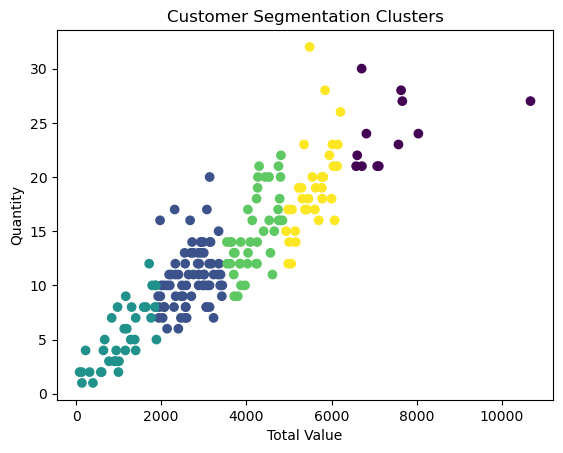

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Load the datasets

customers = pd.read_csv(r"C:\Users\Anand\Downloads\Customers (1).csv")
products = pd.read_csv(r"C:\Users\Anand\Downloads\Products (1).csv")
transactions = pd.read_csv(r"C:\Users\Anand\Downloads\Transactions.csv")


# Prepare data for clustering
customer_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Choose the number of clusters
kmeans = KMeans(n_clusters=5)  # You can change this number
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalValue', 'Quantity']])

# Calculate DB Index
db_index = davies_bouldin_score(customer_data[['TotalValue', 'Quantity']], customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualize clusters
plt.scatter(customer_data['TotalValue'], customer_data['Quantity'], c=customer_data['Cluster'])
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.show()